# Capstone 14.10

The objective of this capstone is to find and explore a dataset. In doing so, identify an interesting aspect of the data and propose an experiment that could unveil some new, interesting information. 

The dataset I will use for this capstone comes from the Kaggle repository: Crimes in Boston. What I will do is identify 3 Boston districts with the highest crime reports. I'll then identify a crime category commonly reported within each of those districts, and propose an experiment with the aim of exploring ways to reduce said crime category.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('./Thinkful/crime.csv', encoding = 'unicode_escape')

We'll start by looking at the number of reported crime occurances by district. Before we proceed, let's define what a crime is. Merriam-Webster defines crime as "an illegal act for which for which someone can be punished by the government." Taking this definition into account, we must eliminate reported categories that are not explicitely illegal occurances. Such occurances that should not be categorized as crimes include Medical Assistance, Towed, Verbal Disputes, and Motor Vehicle Accident Response. These are all common occurances in the city of Boston, but they are not unlawfully damaging to society. It's also appropriate to eliminate any ambiguous categories that do not provide actionable data such as Violations, Harbor Related Incidents and Other.

In [9]:
omitted_occurances = ['Motor Vehicle Accident Response','Other','Medical Assistance','Verbal Disputes','Investigate Person',
                     'Towed','Investigate Property','Property Lost','Violations','Missing Person Located','Warrant Arrests',
                     'Property Found','License Violation','Police Service Incidents','Recovered Stolen Property',
                      'Harbor Related Incidents','Property Found','Search Warrants','Service','Warrant Arrests'
                     ]
for occurance in omitted_occurances:
    df = df[df['OFFENSE_CODE_GROUP'] != occurance]

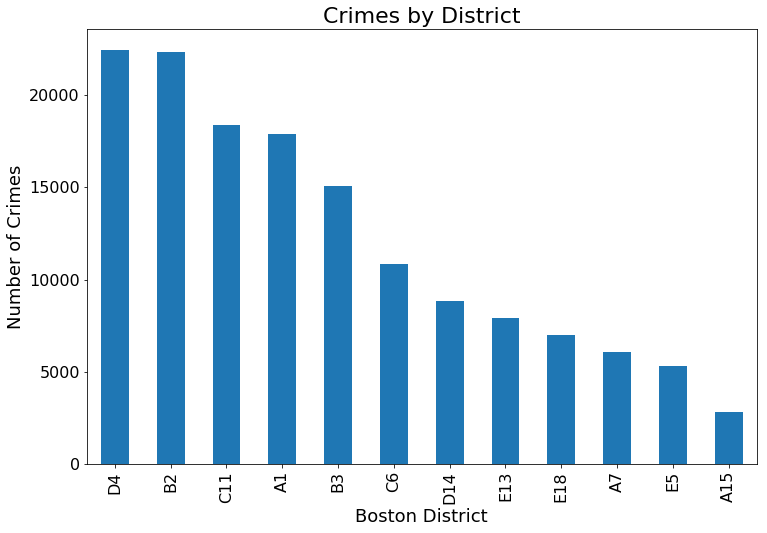

In [10]:
fig = plt.figure(3)
font = {'size':22}
font2 = {'size':18}
df.DISTRICT.value_counts().plot(kind='bar')
fig.set_size_inches(w=12,h=8)
plt.tick_params(labelsize=16)
plt.xlabel('Boston District', fontdict=font2)
plt.ylabel('Number of Crimes', fontdict=font2)
plt.title('Crimes by District', fontdict=font)
plt.show()

Diving into the top 3 Boston districts with the highest rates of reported crime, I'll now take a look at the specific crime categories being reported within each of these districts.

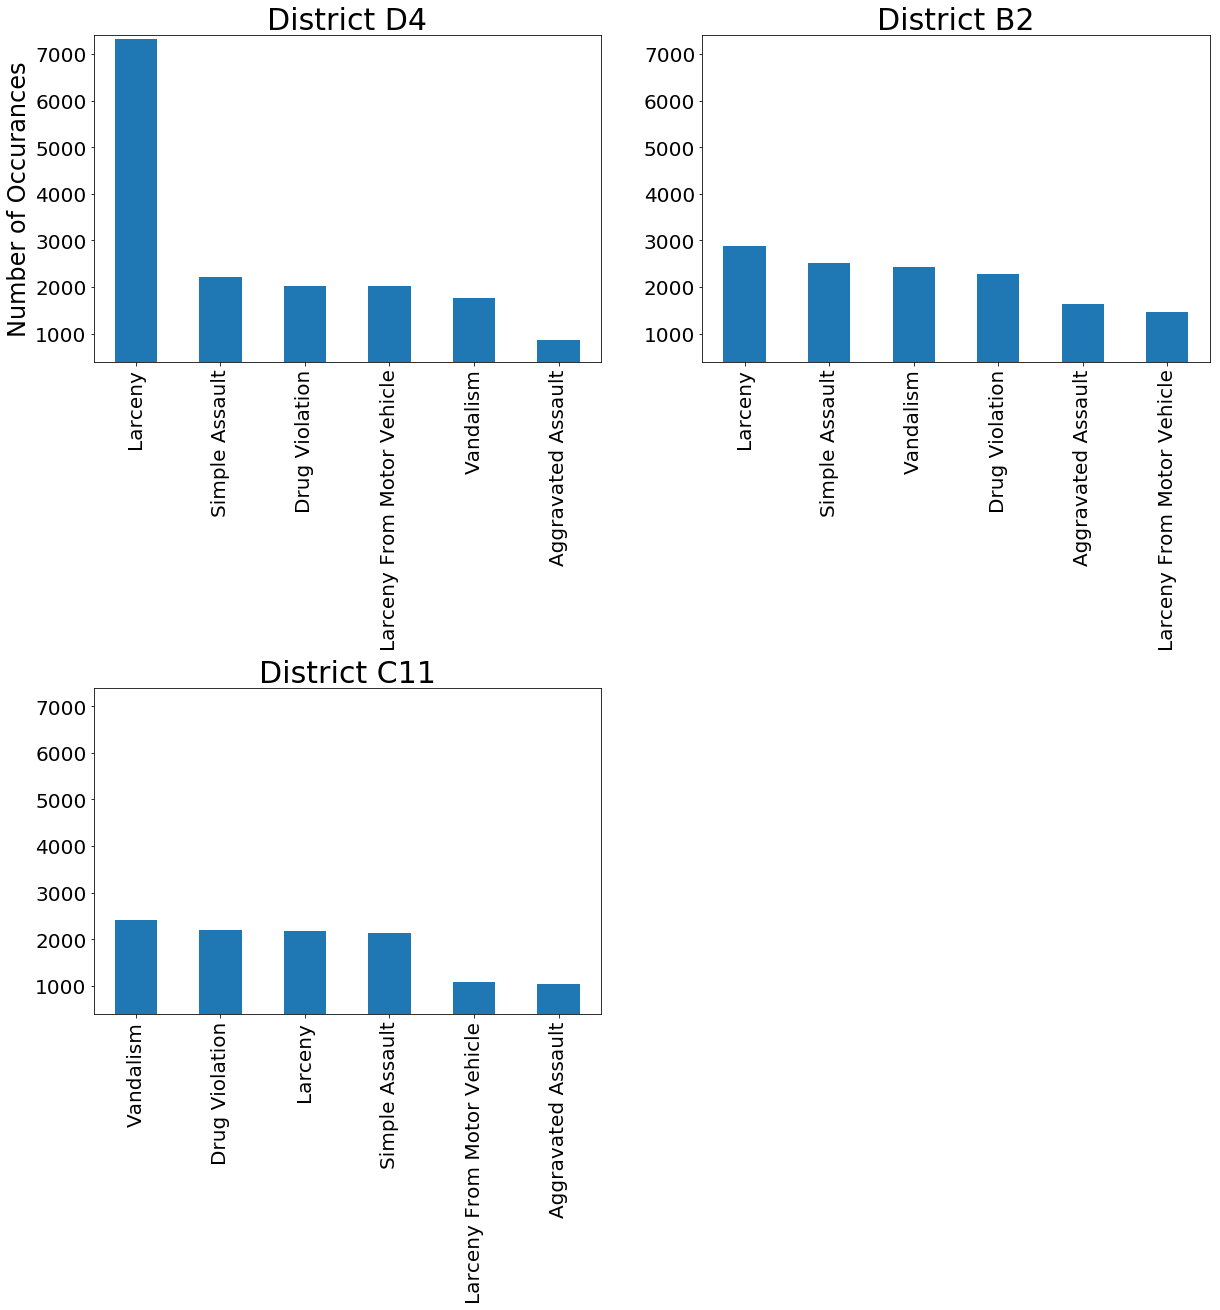

In [11]:
fig = plt.figure()
font = {'size': 24}
font2 = {'size':30}

plt.subplot(3,2,1, autoscale_on=True)
d4_df = df[df['DISTRICT'] == 'D4']
d4_df.groupby(['OFFENSE_CODE_GROUP']).OFFENSE_CODE_GROUP.count().sort_values(ascending=False).head(6).plot(kind='bar')
plt.tick_params(labelsize=20)
plt.ylim(400,7400)
plt.xlabel('')
plt.title('District D4', fontdict=font2)
plt.ylabel('Number of Occurances', fontdict=font)

plt.subplot(3,2,2, autoscale_on=True)
b2_df = df[df['DISTRICT'] == 'B2']
b2_df.groupby(['OFFENSE_CODE_GROUP']).OFFENSE_CODE_GROUP.count().sort_values(ascending=False).head(6).plot(kind='bar')
plt.tick_params(labelsize=20)
plt.ylim(400,7400)
plt.xlabel('')
plt.title('District B2', fontdict=font2)

plt.subplot(3,2,3, autoscale_on=True)
c11_df = df[df['DISTRICT'] == 'C11']
c11_df.groupby(['OFFENSE_CODE_GROUP']).OFFENSE_CODE_GROUP.count().sort_values(ascending=False).head(6).plot(kind='bar')
plt.tick_params(labelsize=20)
plt.ylim(400,7400)
plt.xlabel('')
plt.title('District C11', fontdict=font2)

fig.set_size_inches(w=20,h=30)
fig.subplots_adjust(hspace=1)
plt.show()

When you aggregate the reported crimes across each of these districts, it is clear that larceny is the most commonly reported crime. I'll pivot off this fact and explore ways to reduce the reported occurances of larceny in these districts. Before diving into the experimental proposal, it's important to first understand WHEN larceny is taking place within each of these districts. I'll start by eliminating the other districts from the dataset.

In [12]:
omitted_districts = ['A15', 'A7', 'C6', 'D14', 'E13', 'E18', 'E5', 'A1', 'B3', 'C6'] 
for district in omitted_districts:
    df = df[df['DISTRICT'] != district]

In [29]:
df.OFFENSE_CODE_GROUP.unique()

array(['Larceny From Motor Vehicle', 'Larceny'], dtype=object)

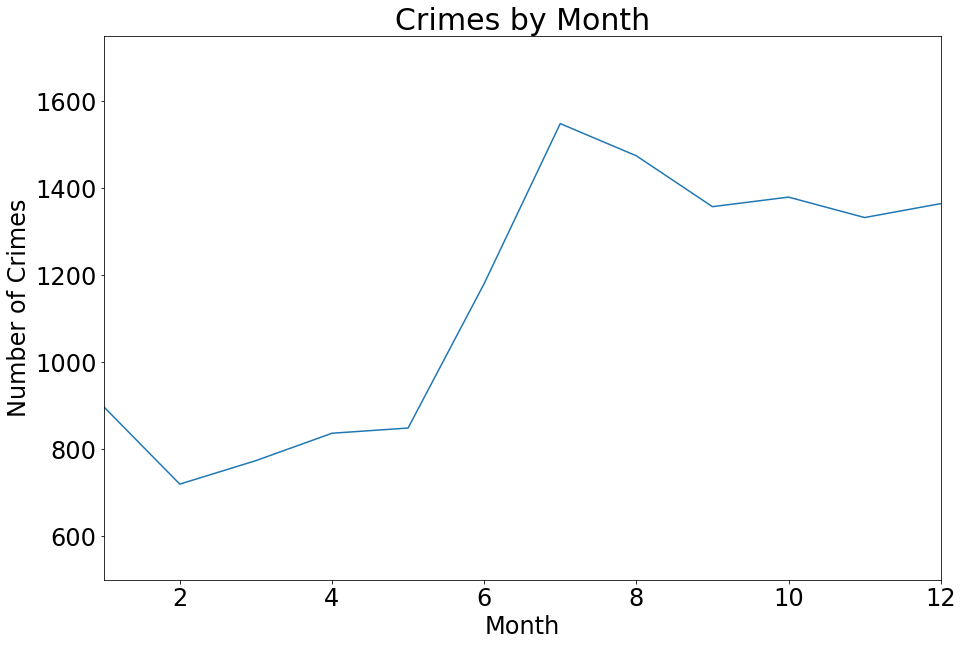

In [33]:
df1617 = df[df.YEAR != 2015]
df1617 = df[df.YEAR != 2018]

# Eliminating all other crime categories so that we're specifically focused on larceny.

all_but_larceny = ['Auto Theft','Fire Related Reports', 'Assembly or Gathering Violations', 'Drug Violation', 
                  'Simple Assault', 'Residential Burglary', 'Restraining Order Violations', 'Ballistics', 
                  'Vandalism', 'Property Related Damage', 'Missing Person Reported', 'Robbery', 'Fraud', 
                   'License Plate Related Incidents', 'Aggravated Assault','Firearm Violations', 'Harassment', 
                   'Disorderly Conduct','Counterfeiting', 'Liquor Violation', 'Landlord/Tenant Disputes',
                   'Operating Under the Influence', 'Confidence Games',
                   'Firearm Discovery', 'Prostitution', 'Auto Theft Recovery',
                   'Bomb Hoax', 'Evading Fare', 'Offenses Against Child / Family',
                   'Commercial Burglary', 'Homicide', 'Embezzlement', 'Explosives',
                   'Criminal Harassment', 'Prisoner Related Incidents',
                   'Other Burglary', 'Arson', 'HOME INVASION',
                   'Phone Call Complaints', 'Gambling', 'Aircraft',
                   'HUMAN TRAFFICKING', 'Manslaughter', 'INVESTIGATE PERSON']
for occurance in all_but_larceny:
    df = df[df['OFFENSE_CODE_GROUP'] != occurance]

fig = plt.figure()
font = {'size':30}
font2 = {'size':24}
df1617.groupby(['MONTH']).MONTH.count().head(12).plot()
plt.ylim(500,1750)
plt.tick_params(labelsize=24)
plt.xlabel('Month', fontdict=font2)
plt.ylabel('Number of Crimes', fontdict=font2)
plt.title('Crimes by Month', fontdict=font)
fig.set_size_inches(w=15,h=10)
plt.show()

Looking specifically at larceny reports in 2016 and 2017 within Districts D4, B2 and C11, it's clear that larceny is more common in the summer months than the winter months. We'll now take a look at the frequency of larceny each day of the week in 2016/2017.

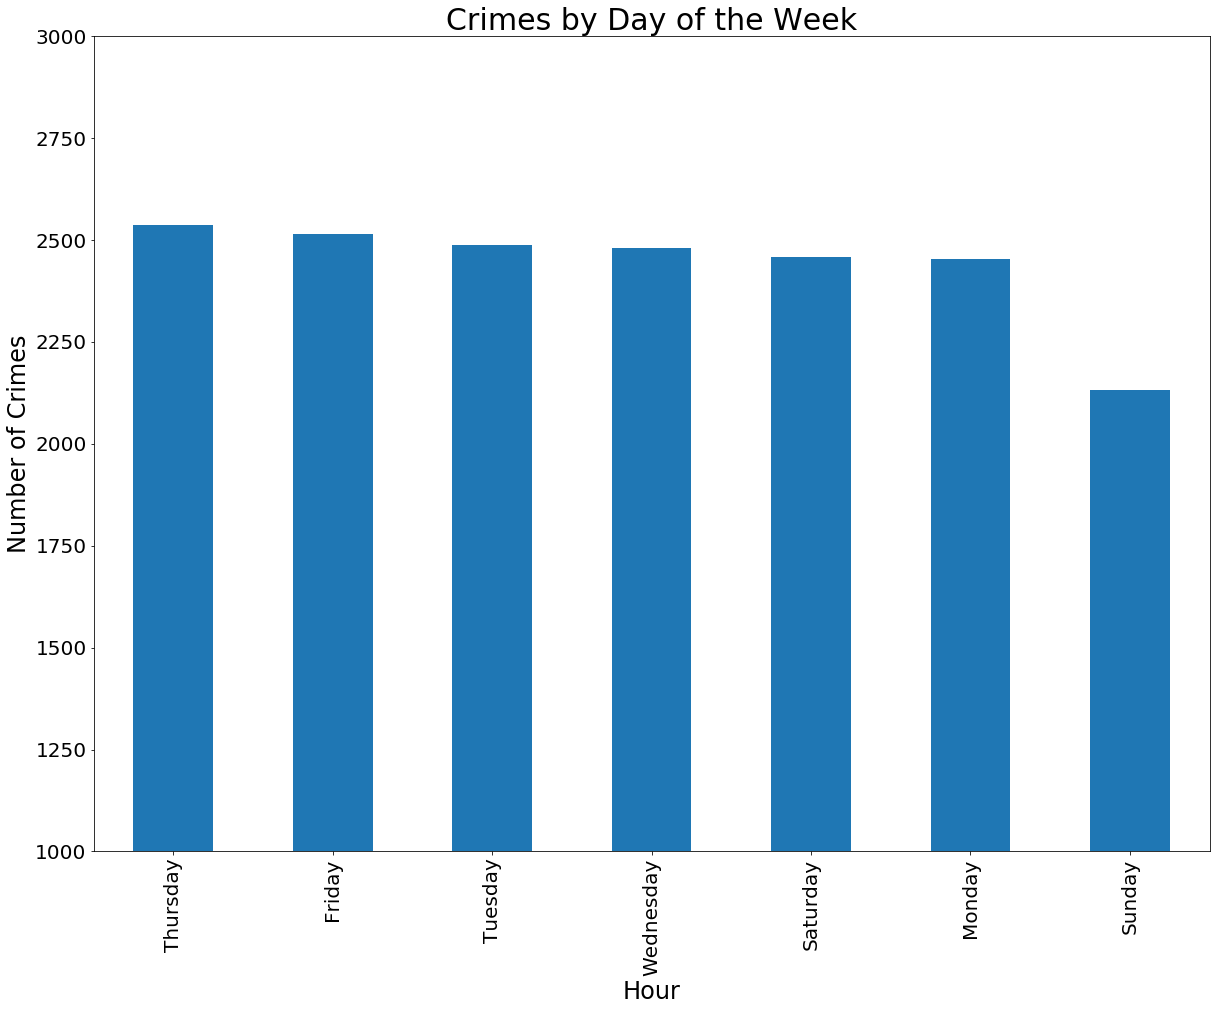

In [37]:
fig = plt.figure()
font = {'size':30}
font2 = {'size':24}
df.DAY_OF_WEEK.value_counts().plot(kind='bar')
fig.set_size_inches(w=20,h=15)
plt.ylim(1000,3000)
plt.tick_params(labelsize=20)
plt.xlabel('Hour', fontdict=font2)
plt.ylabel('Number of Crimes', fontdict=font2)
plt.title('Crimes by Day of the Week', fontdict=font)
plt.show()

Larceny reports appear to be consistent across most days of the week. The only possible exception is Sundays. Finally, we'll drill into reports of larceny across hours of the day. 

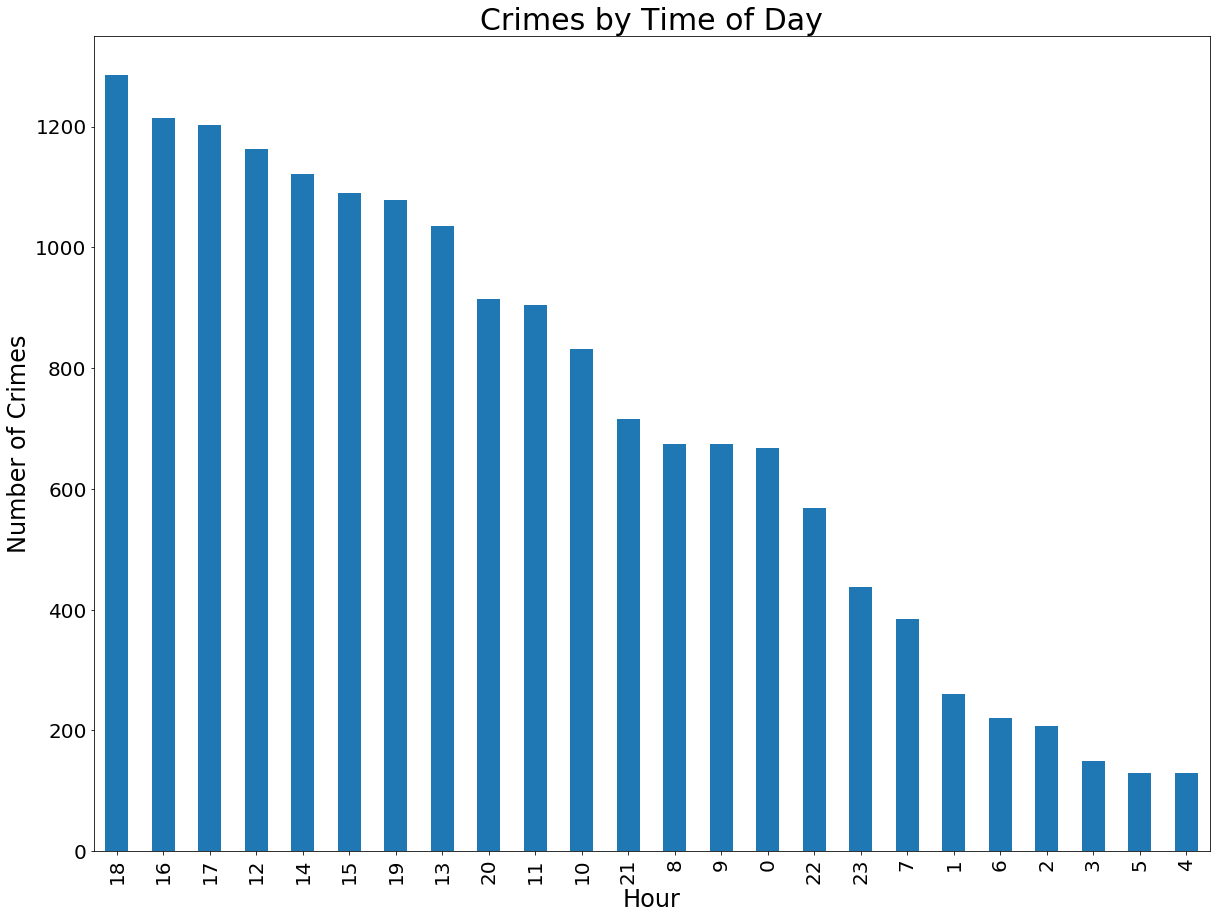

In [38]:
fig = plt.figure()
font = {'size':30}
font2 = {'size':24}
df.HOUR.value_counts().plot(kind='bar')
fig.set_size_inches(w=20,h=15)
plt.tick_params(labelsize=20)
plt.xlabel('Hour', fontdict=font2)
plt.ylabel('Number of Crimes', fontdict=font2)
plt.title('Crimes by Time of Day', fontdict=font)
plt.show()

Pretty clear that larceny reports occur most frequently around the mid to late-afternoon hours. This gives us enough information to build out an experiment.

## Analysis that highlights the experimental hypothesis

We can start building out the experimental proposal. Knowing that larceny occurs most commonly during the summer months on weekdays from the hours of 4-6pm EST, we can adjust certain variables within the Boston Police Department to see if those adjustments can effectively reduce the number of larceny reports within each of these 3 districts. The variable I'll focus on for this experiment is the number of deployed resources during those hours. I will hypothesize that a resource increase of 10% during the hours of 4-6pm during the month of July will significantly reduce the number of larceny reports in districts D4, B2 and C11. 

## A rollout plan showing how you would implement and rollout the experiment

To begin exploring this hypothesis, what I would propose is that the Boston Police Department re-allocates resources from other hours of the day in these districts to provide the 10% increase in police ground presence during the hours of 4-6pm EST on weekdays during the month of July. First, to analyze baseline reports without the increase, larceny reports should be recorded for the first two weeks of July. The increase in police ground presense should be increased the following two weeks of July following the control measurement. If there is a clear reduction in the number of larceny reports at the end of the month, then we can consider rejecting the null hypothesis (that the 10% increase in police presence did not impact the number of larceny reports in districts D4, B2 and C11. 

## An evaluation plan showing what constitutes success in this experiment

We will measure success in this experiment by conducting a t-test and calculating the p-value between the control and the test group. If the t-value and p-value can effectively reject the null hypothesis, we can confidently state that the 10% increase in police presense within districts B2, D4 and C11 during the hours of 4-6pm EST on weekdays effectively reduces the number of larceny reports.